## Code 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import the train data

train = pd.read_csv('../../Data/training.csv')
print (train.describe())
print ("\n ------------------------------- \n",train.columns)


       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

 ------------------------------- 
 Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudRes

In [11]:
# verify the type of the data
print (train.dtypes)

# verify the number of different CurrenciesCode in the data
print ("\n-------------------------------\n",train.groupby(train['CurrencyCode']).count())

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

-------------------------------
               TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
CurrencyCode                                                                  
UGX                   95662    95662      95662           95662       95662   

              CountryCode  ProviderId  ProductId  ProductCategory  ChannelId  \
CurrencyCode                                                                   
UGX                 95662       95662     

In [13]:
train.groupby('CurrencyCode').count()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
CurrencyCode,,,,,,,,,,,,,,,
UGX,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662


In [14]:
train.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [15]:
train["CurrencyCode"].value_counts()

UGX    95662
Name: CurrencyCode, dtype: int64

In [16]:
train.groupby('CountryCode').count()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
CountryCode,,,,,,,,,,,,,,,
256,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662


In [17]:
train["FraudResult"].value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

In [19]:
train.groupby("FraudResult").count()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
FraudResult,,,,,,,,,,,,,,,
0,95469,95469,95469,95469,95469,95469,95469,95469,95469,95469,95469,95469,95469,95469,95469
1,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193


In [45]:
test = train.copy()
test.drop("TransactionId", axis=1, inplace=True)
test.drop("BatchId", axis=1, inplace=True)
test.drop("CurrencyCode", axis=1, inplace=True)
test.drop("CountryCode", axis=1, inplace=True)
test.drop("AccountId", axis=1, inplace=True)
test.drop("SubscriptionId", axis=1, inplace=True)
test.drop("CustomerId", axis=1, inplace=True)
test.drop("ProviderId", axis=1, inplace=True)
test.drop("ProductId", axis=1, inplace=True)
test.drop("ProductCategory", axis=1, inplace=True)
test.drop("ChannelId", axis=1, inplace=True)
test.drop("Amount", axis=1, inplace=True)
test.drop("Value", axis=1, inplace=True)
for each in test.columns:
    print (each, train[each].value_counts(),"\n")

TransactionStartTime 2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-24T16:30:12Z     6
2018-12-07T13:09:44Z     6
2018-11-15T07:03:27Z     5
                        ..
2018-12-18T17:47:09Z     1
2018-12-18T17:44:25Z     1
2018-12-18T17:43:50Z     1
2018-12-18T17:42:49Z     1
2019-02-13T10:01:28Z     1
Name: TransactionStartTime, Length: 94556, dtype: int64 

PricingStrategy 2    79848
4    13562
1     1867
0      385
Name: PricingStrategy, dtype: int64 

FraudResult 0    95469
1      193
Name: FraudResult, dtype: int64 



In [27]:
train["FraudResult"].unique()

array([0, 1], dtype=int64)

In [34]:
train["CountryCode"].value_counts()

256    95662
Name: CountryCode, dtype: int64

<AxesSubplot:>

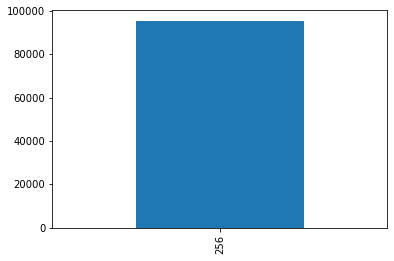

In [49]:
train["Value"].groupby(train["FraudResult"]).describe()


,count,mean,std,min,25%,50%,75%,max
FraudResult,,,,,,,,
0,95469.0,6.763227e+03,3.999484e+04,2.0,250.0,1000.0,5000.0,2400000.0
1,193.0,1.561820e+06,2.081227e+06,500.0,500000.0,650000.0,2000000.0,9880000.0


In [55]:
# verify the difference between Amount and Value
print (train["Amount"].head())
print (train["Value"].head())



0     1000.0
1      -20.0
2      500.0
3    20000.0
4     -644.0
Name: Amount, dtype: float64
0     1000
1       20
2      500
3    21800
4      644
Name: Value, dtype: int64


In [66]:
test2 = train.copy()

# for each in test2["Amount"] if test2["Amount"] != absolute(test2["Value"]):

diff = test2["Amount"] - abs(test2["Value"])

#diff.value_counts()


print (diff.describe())
#save as csv
diff.describe().to_csv("../Report/images/Amout_Value_description.csv")

count    9.566200e+04
mean    -3.182738e+03
std      1.769231e+04
min     -2.000000e+06
25%     -1.000000e+02
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
dtype: float64
